In [1]:
import numpy as np
import pandas as pd

from dask.distributed import Client

# git clone https://github.com/aminnj/daskucsd
# and make workerenv tarball as specified in those instructions
from daskucsd.condor_utils import make_htcondor_cluster

In [2]:
cluster = make_htcondor_cluster(local=False, dashboard_address=13345,memory="4GB")
cluster

In [3]:
# or scale by hand
cluster.scale(30)

In [7]:
client = Client(cluster)
client

Client Scheduler: tcp://169.228.130.74:16623 Dashboard: http://169.228.130.74:13345/status,Cluster Workers: 21 Cores: 21 Memory: 84.00 GB


In [8]:
# Get condor job attributes from each worker

def f():
    import subprocess
    return subprocess.getoutput("grep ProcId $_CONDOR_JOB_AD")
# client.run(f,workers=["tcp://169.228.131.97:33361"])
client.run(f)

{'tcp://169.228.130.151:45796': 'ProcId = 0\nJOB_GLIDEIN_ProcId = "1"\nJobAdInformationAttrs = "JOB_Site JOB_GLIDEIN_Entry_Name JOB_GLIDEIN_Name JOB_GLIDEIN_Factory JOB_GLIDEIN_Schedd JOB_GLIDEIN_ClusterId JOB_GLIDEIN_ProcId JOB_GLIDEIN_Site JOB_GLIDEIN_SiteWMS JOB_GLIDEIN_SiteWMS_Slot JOB_GLIDEIN_SiteWMS_JobId JOB_GLIDEIN_SiteWMS_Queue"',
 'tcp://169.228.130.151:45830': 'ProcId = 0\nJOB_GLIDEIN_ProcId = "1"\nJobAdInformationAttrs = "JOB_Site JOB_GLIDEIN_Entry_Name JOB_GLIDEIN_Name JOB_GLIDEIN_Factory JOB_GLIDEIN_Schedd JOB_GLIDEIN_ClusterId JOB_GLIDEIN_ProcId JOB_GLIDEIN_Site JOB_GLIDEIN_SiteWMS JOB_GLIDEIN_SiteWMS_Slot JOB_GLIDEIN_SiteWMS_JobId JOB_GLIDEIN_SiteWMS_Queue"',
 'tcp://169.228.131.142:39633': 'ProcId = 0\nJOB_GLIDEIN_ProcId = "1"\nJobAdInformationAttrs = "JOB_Site JOB_GLIDEIN_Entry_Name JOB_GLIDEIN_Name JOB_GLIDEIN_Factory JOB_GLIDEIN_Schedd JOB_GLIDEIN_ClusterId JOB_GLIDEIN_ProcId JOB_GLIDEIN_Site JOB_GLIDEIN_SiteWMS JOB_GLIDEIN_SiteWMS_Slot JOB_GLIDEIN_SiteWMS_JobId JOB

In [13]:
# client.shutdown()
# client.retire_workers(workers=["tcp://169.228.131.97:33361"],)
# client.restart()

In [14]:
# port forward 13345 to your laptop and either open this url in a new tab, or keep in an IFrame here

# from IPython.display import IFrame    
# IFrame('http://localhost:13345/status', width="100%", height=750)

In [18]:
def f():
    import psutil
    ret = psutil.virtual_memory()
    return ret
out = client.run(f)
data = []
for k,v in out.items():
    data.append(dict(name=k,
                     total=v.total//1e9,
                     available=v.available//1e9,
                     used=v.used//1e9,
                     free=v.free//1e9,
                     active=v.active//1e9,
                     inactive=v.inactive//1e9,
                     buffers=v.buffers//1e9,
                     cached=v.cached//1e9,
                     shared=v.shared//1e9,
                     slab=v.slab//1e9,
                    ))
df = pd.DataFrame(data).set_index("name")

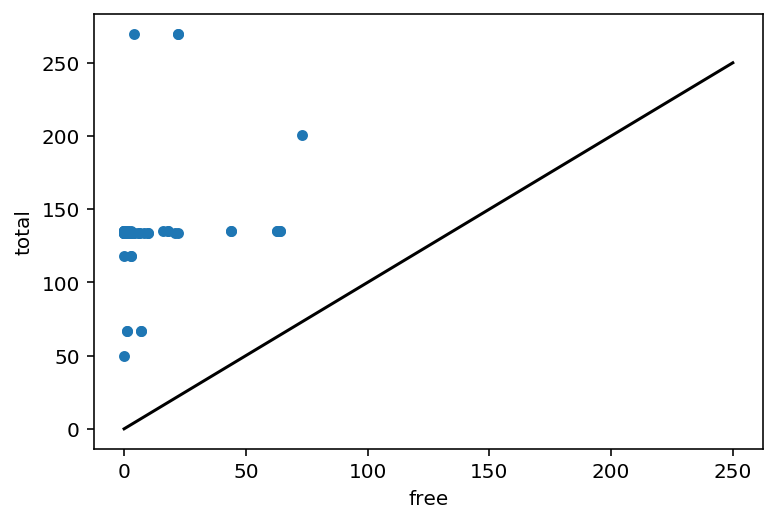

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# df.plot.scatter(ax=ax,x="available",y="total")
df.plot.scatter(ax=ax,x="free",y="total")
ax.plot([0,250],[0,250],color="k")

In [20]:
df.query("free < 1")

,total,available,used,free,active,inactive,buffers,cached,shared,slab
name,,,,,,,,,,
tcp://169.228.131.197:40143,50.0,18.0,31.0,0.0,30.0,13.0,4.0,13.0,0.0,5.0
tcp://169.228.131.231:40764,135.0,88.0,46.0,0.0,53.0,73.0,3.0,84.0,0.0,5.0
tcp://169.228.131.234:44253,135.0,86.0,48.0,0.0,50.0,77.0,3.0,82.0,0.0,5.0
tcp://169.228.131.248:36033,135.0,77.0,57.0,0.0,60.0,67.0,3.0,73.0,0.0,5.0
tcp://169.228.131.248:36153,135.0,77.0,57.0,0.0,60.0,67.0,3.0,73.0,0.0,5.0
tcp://169.228.131.54:42116,134.0,99.0,34.0,0.0,68.0,53.0,0.0,99.0,0.0,10.0
tcp://169.228.131.54:43795,134.0,99.0,34.0,0.0,68.0,53.0,0.0,99.0,0.0,10.0
tcp://169.228.131.56:38281,134.0,105.0,29.0,0.0,63.0,58.0,0.0,105.0,0.0,11.0
tcp://169.228.131.76:42964,135.0,101.0,33.0,0.0,38.0,90.0,3.0,98.0,0.0,4.0


In [23]:
import time
for i in range(100):
    tail = []
    for k,v in client.processing().items():
        if len(v):
            tail.append(k)
    x = df[df.index.isin(tail)]
    nbad = (x["free"] < 1).sum()
    ntot = len(tail)
    print(nbad,ntot)
    time.sleep(1)

0 1
0 1
0 0
0 0
0 0
0 0
0 0
2 10
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


distributed.utils - ERROR - "('reset_index-1f9bd95667e15b823e90cea095b1e94f', 11)"
Traceback (most recent call last):
  File "/home/users/namin/miniconda3/envs/analysisenv/lib/python3.7/site-packages/distributed/utils.py", line 663, in log_errors
    yield
  File "/home/users/namin/miniconda3/envs/analysisenv/lib/python3.7/site-packages/distributed/scheduler.py", line 1503, in add_worker
    typename=types[key],
KeyError: "('reset_index-1f9bd95667e15b823e90cea095b1e94f', 11)"
distributed.core - ERROR - "('reset_index-1f9bd95667e15b823e90cea095b1e94f', 11)"
Traceback (most recent call last):
  File "/home/users/namin/miniconda3/envs/analysisenv/lib/python3.7/site-packages/distributed/core.py", line 412, in handle_comm
    result = await result
  File "/home/users/namin/miniconda3/envs/analysisenv/lib/python3.7/site-packages/distributed/scheduler.py", line 1503, in add_worker
    typename=types[key],
KeyError: "('reset_index-1f9bd95667e15b823e90cea095b1e94f', 11)"


In [17]:
tail = [
 'tcp://169.228.130.210:46201',
 'tcp://169.228.131.142:43768',
 'tcp://169.228.131.222:36952',
 'tcp://169.228.131.231:40764',
 'tcp://169.228.131.250:35689',
 'tcp://169.228.131.83:33386',
 'tcp://169.228.131.83:44820',
 'tcp://169.228.132.135:15245',
 'tcp://169.228.132.161:11593',
]

df[df.index.isin(tail)]

,total,available,used,free,active,inactive,buffers,cached,shared,slab
name,,,,,,,,,,
tcp://169.228.130.210:46201,67.0,38.0,28.0,7.0,34.0,15.0,6.0,24.0,0.0,8.0
tcp://169.228.131.142:43768,270.0,219.0,49.0,20.0,125.0,118.0,0.0,200.0,0.0,3.0
tcp://169.228.131.222:36952,118.0,63.0,54.0,3.0,55.0,53.0,3.0,57.0,0.0,4.0
tcp://169.228.131.231:40764,135.0,87.0,46.0,1.0,53.0,73.0,3.0,82.0,0.0,5.0
tcp://169.228.131.250:35689,135.0,60.0,73.0,6.0,74.0,47.0,3.0,51.0,0.0,4.0
tcp://169.228.131.83:33386,135.0,92.0,42.0,0.0,46.0,82.0,3.0,89.0,0.0,5.0
tcp://169.228.131.83:44820,135.0,92.0,42.0,0.0,46.0,82.0,3.0,89.0,0.0,5.0
tcp://169.228.132.135:15245,134.0,62.0,71.0,0.0,73.0,50.0,0.0,62.0,0.0,8.0
tcp://169.228.132.161:11593,134.0,58.0,75.0,2.0,68.0,49.0,0.0,57.0,0.0,10.0
